In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import os
import cv2

### 1. Binary Morphology

In [2]:
image_path = "Desktop/7.1.08.tiff"
img = plt.imread(image_path)
print(img)

[[133 133 131 ... 130 126 118]
 [130 123 133 ... 126 126 124]
 [124 121 121 ... 128 126 126]
 ...
 [154 156 154 ... 150 152 150]
 [152 154 154 ... 154 154 156]
 [154 156 154 ... 154 147 145]]


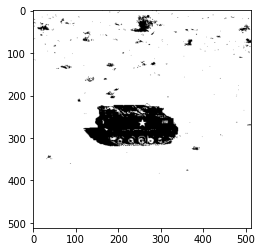

In [3]:
new_arr = np.array(img)
def modal_threshold(I,threshold):
    for i in range(0,I.shape[0]):
        for j in range(I.shape[1]):
            if (I[i][j]<threshold):
                I[i][j] = 0
            else:
                I[i][j] =1
    return I

threshold = 80
Im = modal_threshold(new_arr,threshold)
plt.imshow(Im,cmap='gray')

In [4]:
row = {(0,-2),(0,-1),(0,0),(0,1),(0,2)}
col = {(-2,0),(-1,0),(0,0),(1,0),(2,0)}
cross = row | col
print(cross)

{(0, 1), (0, 0), (-1, 0), (-2, 0), (2, 0), (0, -1), (0, -2), (1, 0), (0, 2)}


In [5]:
row1 = {(-1,0),(0,0),(1,0)}
row2 = {(-1,1),(0,1),(1,1)}
row3 = {(-1,-1),(0,-1),(1,-1)}
square = row1 | row2 | row3
print(square)

{(0, 1), (-1, 1), (0, 0), (-1, 0), (-1, -1), (0, -1), (1, 0), (1, -1), (1, 1)}


In [6]:
def dilate(Image,window):
    J = np.zeros(Image.shape)
    for i in range(Image.shape[0]):
        for j in range(Image.shape[1]):
            #curr_pixel = Image[i][j]
            for ele in window:
                if ((i-ele[0])<0 or (j-ele[1])<0):
                    continue
                if((i-ele[0])<Image.shape[0] and (j-ele[1])<Image.shape[1]):
                    J[i][j] = Image[i-ele[0]][j-ele[1]] or Image[i][j]
            #J[i][j] = curr_pixel
    return J

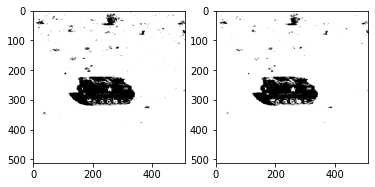

In [7]:
dilated = dilate(Im,cross)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(Im,cmap='gray')
ax2.imshow(dilated,cmap='gray')

In [ ]:
#print(Im1)

In [8]:
def erode(Image,window):
    J = np.zeros(Image.shape)
    for i in range(Image.shape[0]):
        for j in range(Image.shape[1]):
            for ele in window:
                if ((i-ele[0])<0 or (j-ele[1])<0): #ensuring i-p and j-q remain in the range
                    continue
                if((i-ele[0])<Image.shape[0] and (j-ele[1])<Image.shape[1]): 
                    J[i][j] = Image[i-ele[0]][j-ele[1]] and Image[i][j]
    return J

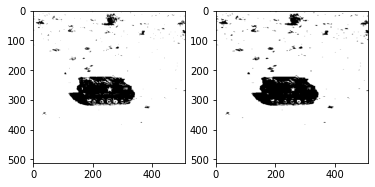

In [9]:
eroded = erode(Im,cross)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(Im,cmap='gray')
ax2.imshow(eroded,cmap='gray')

In [10]:
def median(Image,window):
    J = np.zeros(Image.shape)
    for i in range(Image.shape[0]):
        for j in range(Image.shape[1]):
            cnt1 = 0
            cnt2 = 0
            for ele in window:
                if(cnt1>cnt2):
                    J[i][j] = 0
                elif(cnt1<cnt2):
                    J[i][j] = 1
                if ((i-ele[0])<0 or (j-ele[1])<0): #ensuring i-p and j-q remain in the range
                    continue
                if((i-ele[0])<Image.shape[0] and (j-ele[1])<Image.shape[1]): 
                    if Image[i][j] == 0: 
                        cnt1+=1
                    if Image[i][j] == 1:
                        cnt2+= 1
    return J

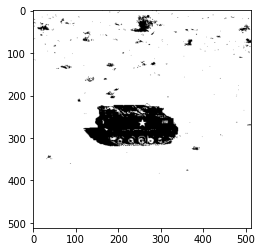

In [11]:
median_img = median(Im,cross)  #Takes time to compute
plt.imshow(median_img,cmap='gray')

In [12]:
def complement(img):
    new = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (img[i][j]==0):
                new[i][j]=1
            elif(img[i][j]==1):
                new[i][j]=0
    return new               

Text(0.5, 1.0, 'Dilate is the dual of Erode')

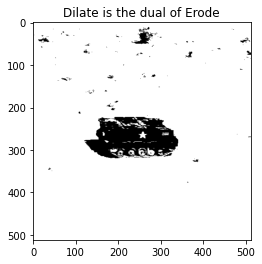

In [13]:
er_di1 = complement(Im)
er_di2 = erode(er_di1,cross)
er_di3 = complement(er_di2)
plt.imshow(er_di3,cmap='gray')
plt.title("Dilate is the dual of Erode")

In [14]:
diff = dilated-er_di3
print(diff)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0.5, 1.0, 'Erode is the dual of Dilate')

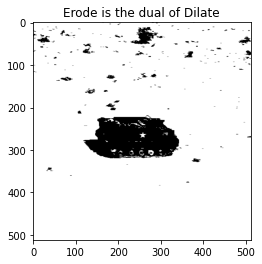

In [15]:
di_er1 = complement(Im)
di_er2 = dilate(di_er1,cross)
di_er3 = complement(di_er2)
plt.imshow(di_er3,cmap='gray')
plt.title("Erode is the dual of Dilate")

In [16]:
diff1 = eroded-di_er3
print(diff1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
'''
def maj():
    cnt1 = 0
    cnt2 = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] == 0:
                cnt1 += 1
            if img[i][j] == 1 :
                cnt2 += 1
    return cnt1,cnt2  
'''

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


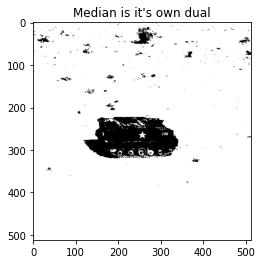

In [17]:
meme1 = complement(Im)
meme2 = median(meme1,cross)
meme3 = complement(meme2)
plt.imshow(meme3,cmap='gray')
plt.title("Median is it's own dual")
print(meme3-median_img)

## 2. Grayscale Operators

In [18]:
image_path = "Desktop/trial3.jpg"
img = plt.imread(image_path)
print(len(img))
print(img.shape)

1546
(1546, 960, 3)


In [19]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [20]:
tr = gray.flatten()

In [21]:
def lin_point(P,I,L):
    J = np.uint8(P*I+L)
    return J    

(array([1.2000e+01, 1.4600e+02, 2.8200e+02, 5.4000e+02, 1.2410e+03,
        2.8770e+03, 6.9600e+03, 1.5153e+04, 2.5871e+04, 3.6075e+04,
        4.3095e+04, 4.6916e+04, 4.7825e+04, 4.6879e+04, 4.4183e+04,
        4.0931e+04, 3.7376e+04, 3.4006e+04, 3.1182e+04, 2.7640e+04,
        2.5010e+04, 2.2922e+04, 2.0985e+04, 1.9133e+04, 1.8131e+04,
        1.6909e+04, 1.5771e+04, 1.4652e+04, 1.3963e+04, 1.3002e+04,
        1.2031e+04, 1.1076e+04, 1.0436e+04, 9.9530e+03, 9.6490e+03,
        9.3850e+03, 9.2540e+03, 8.8160e+03, 8.9170e+03, 8.5950e+03,
        8.4370e+03, 8.1590e+03, 8.1090e+03, 7.9380e+03, 7.6620e+03,
        7.4400e+03, 7.3690e+03, 7.3790e+03, 7.1660e+03, 7.2180e+03,
        7.1190e+03, 7.1210e+03, 7.0930e+03, 7.0310e+03, 6.7980e+03,
        6.8710e+03, 6.7340e+03, 6.7020e+03, 6.5920e+03, 6.6950e+03,
        6.4720e+03, 6.3780e+03, 6.4760e+03, 6.4110e+03, 6.3880e+03,
        6.2770e+03, 6.3870e+03, 6.3300e+03, 6.4340e+03, 6.5150e+03,
        6.4330e+03, 6.3350e+03, 6.3320e+03, 6.31

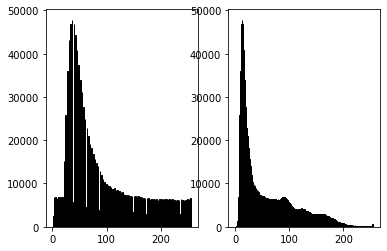

In [22]:
Im_1 = lin_point(3,gray,0)  #P=5 #L=0 #J=PI
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(Im_1.reshape(-1),256,[0,256],ec='k',fc='k')
ax2.hist(tr,256,[0,256],ec='k',fc='k')

(array([1.2000e+01, 1.4600e+02, 2.8200e+02, 5.4000e+02, 1.2410e+03,
        2.8770e+03, 6.9600e+03, 1.5153e+04, 2.5871e+04, 3.6075e+04,
        4.3095e+04, 4.6916e+04, 4.7825e+04, 4.6879e+04, 4.4183e+04,
        4.0931e+04, 3.7376e+04, 3.4006e+04, 3.1182e+04, 2.7640e+04,
        2.5010e+04, 2.2922e+04, 2.0985e+04, 1.9133e+04, 1.8131e+04,
        1.6909e+04, 1.5771e+04, 1.4652e+04, 1.3963e+04, 1.3002e+04,
        1.2031e+04, 1.1076e+04, 1.0436e+04, 9.9530e+03, 9.6490e+03,
        9.3850e+03, 9.2540e+03, 8.8160e+03, 8.9170e+03, 8.5950e+03,
        8.4370e+03, 8.1590e+03, 8.1090e+03, 7.9380e+03, 7.6620e+03,
        7.4400e+03, 7.3690e+03, 7.3790e+03, 7.1660e+03, 7.2180e+03,
        7.1190e+03, 7.1210e+03, 7.0930e+03, 7.0310e+03, 6.7980e+03,
        6.8710e+03, 6.7340e+03, 6.7020e+03, 6.5920e+03, 6.6950e+03,
        6.4720e+03, 6.3780e+03, 6.4760e+03, 6.4110e+03, 6.3880e+03,
        6.2770e+03, 6.3870e+03, 6.3300e+03, 6.4340e+03, 6.5150e+03,
        6.4330e+03, 6.3350e+03, 6.3320e+03, 6.31

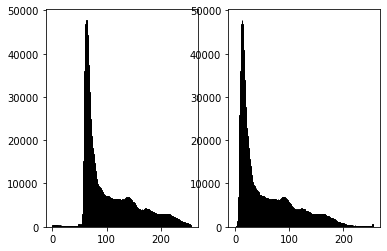

In [23]:
Im_2 = lin_point(1,gray,50) #P=1 L=50 J = I+L
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(Im_2.reshape(-1),256,[0,256],ec='k',fc='k')
ax2.hist(tr,256,[0,256],ec='k',fc='k')

#### 2.Full scale contrast stretch (FSCS). Verify your result by printing the min and max pixel values before and after applying FSCS. Also, plot the histogram of the image before and after applying FSCS.

In [24]:
K = 256
I = gray.reshape(-1)
B = max(I)
A = min(I)
P = (K-1)/(B-A)
L = -A*P
out = lin_point(P,gray,L)
print(max(out.reshape(-1)))
print(min(out.reshape(-1)))

255
0


(array([1.2000e+01, 1.4600e+02, 2.8200e+02, 5.4000e+02, 1.2410e+03,
        2.8770e+03, 6.9600e+03, 1.5153e+04, 2.5871e+04, 3.6075e+04,
        4.3095e+04, 4.6916e+04, 4.7825e+04, 4.6879e+04, 4.4183e+04,
        4.0931e+04, 3.7376e+04, 3.4006e+04, 3.1182e+04, 2.7640e+04,
        2.5010e+04, 2.2922e+04, 2.0985e+04, 1.9133e+04, 1.8131e+04,
        1.6909e+04, 1.5771e+04, 1.4652e+04, 1.3963e+04, 1.3002e+04,
        1.2031e+04, 1.1076e+04, 1.0436e+04, 9.9530e+03, 9.6490e+03,
        9.3850e+03, 9.2540e+03, 8.8160e+03, 8.9170e+03, 8.5950e+03,
        8.4370e+03, 8.1590e+03, 8.1090e+03, 7.9380e+03, 7.6620e+03,
        7.4400e+03, 7.3690e+03, 7.3790e+03, 7.1660e+03, 7.2180e+03,
        7.1190e+03, 7.1210e+03, 7.0930e+03, 7.0310e+03, 6.7980e+03,
        6.8710e+03, 6.7340e+03, 6.7020e+03, 6.5920e+03, 6.6950e+03,
        6.4720e+03, 6.3780e+03, 6.4760e+03, 6.4110e+03, 6.3880e+03,
        6.2770e+03, 6.3870e+03, 6.3300e+03, 6.4340e+03, 6.5150e+03,
        6.4330e+03, 6.3350e+03, 6.3320e+03, 6.31

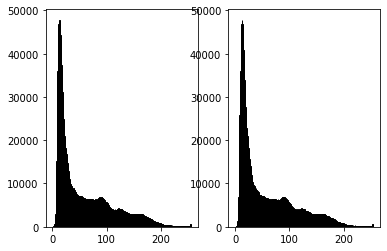

In [25]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(I,bins=256,range=(0.0,255.0),fc = 'k',ec = 'k')
ax2.hist(out.reshape(-1),bins=256,range=(0.0,255.0),fc = 'k',ec = 'k')

#### 3. Log magnitude compression (always followed by FSCS). Plot the histogram of the image before and after applying log magnitude compression.

In [26]:
def logscale(img):
    J = np.log2(1+img)
    J = np.array(J)
    J = np.uint8(J)
    return J

In [27]:
def log_FSCS(img):
    J = logscale(img)
    K = 256
    I = img.reshape(-1)
    B = max(I)
    A = min(I)
    P = (K-1)/(B-A)
    L = -A*P
    J = lin_point(P,img,L)
    return J    

/home/varshi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


Text(0.5, 1.0, 'Log ')

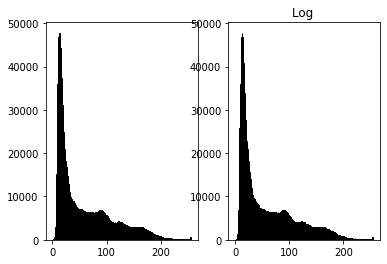

In [28]:
log = log_FSCS(gray)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(gray.reshape(-1),256,[0,256],fc = 'k',ec = 'k')
ax2.hist(log.reshape(-1),256,[0,256],fc = 'k',ec = 'k')
plt.title("Log ")

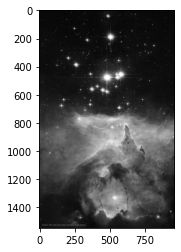

In [29]:
plt.imshow(gray,cmap='gray')

#### 4. Histogram flattening. Plot the histogram of the image before and after applying histogram flattening.

In [30]:
m = gray.shape[0]
n = gray.shape[1]
hist = [0]*256
for i in range(m):
    for j in range(n):
        hist[gray[i, j]]+=1
hist = np.array(hist)
hist.shape
#print(hist)

(256,)

In [31]:
cdf = [0]*len(hist)
cdf[0] = hist[0]
for i in range(1,len(hist)):
    cdf[i] = cdf[i-1]+hist[i]
cdf = np.array(cdf)/(m*n)
cdf.shape
#print(cdf)

(256,)

In [32]:
J = np.zeros(shape=(m,n))
for i in range(0, m):
    for j in range(0, n):
        J[i, j] = cdf[gray[i, j]]
print(J)

[[0.08910899 0.06007236 0.03576569 ... 0.00812446 0.06007236 0.46677919]
 [0.08910899 0.06007236 0.03576569 ... 0.00343494 0.01833428 0.4424496 ]
 [0.08910899 0.06007236 0.06007236 ... 0.00812446 0.03576569 0.43304159]
 ...
 [0.28997413 0.21429967 0.21429967 ... 0.08910899 0.08910899 0.08910899]
 [0.21429967 0.24187823 0.31098399 ... 0.08910899 0.08910899 0.08910899]
 [0.28997413 0.31098399 0.32960732 ... 0.08910899 0.08910899 0.08910899]]


In [33]:
K = 256
I = J.reshape(-1)
B = max(I)
A = min(I)
P = (K-1)/(B-A)
L = -A*P
flat_img = lin_point(P,J,L)
flat_img.shape
print(flat_img)
print(np.amax(flat_img))
#All Good

[[ 22  15   9 ...   2  15 119]
 [ 22  15   9 ...   0   4 112]
 [ 22  15  15 ...   2   9 110]
 ...
 [ 73  54  54 ...  22  22  22]
 [ 54  61  79 ...  22  22  22]
 [ 73  79  84 ...  22  22  22]]
255


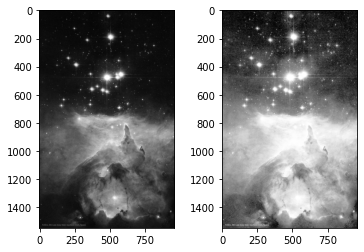

In [34]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(gray,cmap='gray')
ax2.imshow(flat_img,cmap='gray')

Text(0.5, 1.0, 'After flattening')

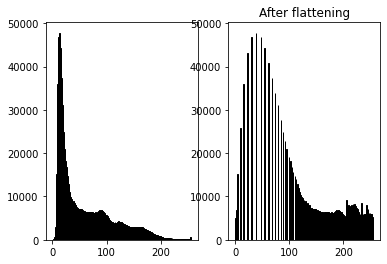

In [35]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(gray.reshape(-1),256,[0,256],fc = 'k',ec = 'k')
ax2.hist(flat_img.reshape(-1),256,[0,256],fc = 'k',ec = 'k') 
plt.title("After flattening")

### 3. Zooming

#### Write a program to zoom an image by 1.5 times along each axis using the following techniques discussed in class:
1. Nearest neighbor. (5)

In [36]:
def nearest_neighbour(img,scaling):
    rows = img.shape[0] #NxN
    colums = img.shape[1]
    print(rows)
    new_row = int(rows*scaling)
    new_col = int(colums*scaling)
    new_shape = (new_row,new_col) #MxM
    print(new_shape)
    J = np.zeros(new_shape).astype(int)
    for i in range(new_row):
        for j in range(new_col):
            fit_factor = 1/scaling #scaling down to find the relevant coordinate in 
            x_fitted = int(i*fit_factor)
            y_fitted = int(j*fit_factor)
            J[i][j] = img[x_fitted][y_fitted]
    return J  

In [37]:
new_img = nearest_neighbour(gray,1.5)
new_img.shape

1546
(2319, 1440)


(2319, 1440)

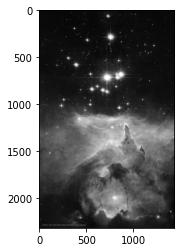

In [38]:
plt.imshow(new_img,cmap='gray')

(0.0, 2319.0)

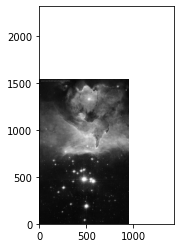

In [39]:
plt.imshow(gray,cmap='gray')
x = new_img.shape[1]
y = new_img.shape[0]
plt.xlim(0,x)
plt.ylim(0,y)

In [40]:
print(new_img.flatten()[:30]) #zoomed

[10 10  9  8  8  9 10 10 10 10 10  8  8  8  9 10 10  9  7  7  7  8  8  9
 20 20 18 15 15 12]


In [41]:
print(gray.flatten()[:30]) #original

[10  9  8  9 10 10 10  8  8  9 10  9  7  7  8  9 20 18 15 12 10  8  8  8
  9 10 10 11 11 10]


1024
(1536, 1536)


Text(0.5, 1.0, 'Zoomed Image')

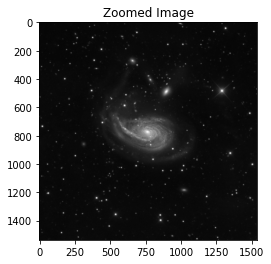

In [42]:
img2 = plt.imread("Desktop/trial.jpg")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img2 = nearest_neighbour(img2,1.5)
plt.imshow(img2,cmap='gray')
plt.title("Zoomed Image")

863
(1294, 1440)


Text(0.5, 1.0, 'Zoomed Image')

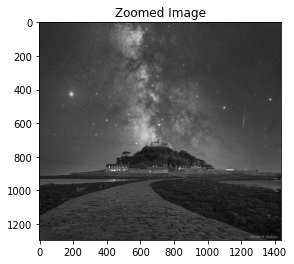

In [43]:
img3 = plt.imread("Desktop/trial2.jpg")
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
img3 = nearest_neighbour(img3,1.5)
plt.imshow(img3,cmap='gray')
plt.title("Zoomed Image")

In [46]:
def bilinear_interpolation(img,scaling):
    rows = img.shape[0] #NxN
    colums = img.shape[1]
    new_row = int(rows*scaling)
    new_col = int(colums*scaling)
    new_shape = (new_row,new_col) #MxM
    J = np.zeros(new_shape).astype(int)
    for i in range(1,new_row-1):
        for j in range(j,new_col-1):
            Io,Jo = img[i-1][j]
            I1,J1 = img[i+1][j]
            I1,J2 = img[i][j-1]
            I2,J2 = img[i][j+1]
            

Bilinear interpolation essentially outputs the weighted average of it's neighbours. The value of it's unknown pixels need not exactly be the same value as it's neighbouring values unlike the nearest neighbout interpolation method. It is also computationally expensive but produces a better image quality (since closest neighbour has a greater influence rather than random allocation).